In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

{'spherical': ['s'], 'temperature': [5500.0, 5600.0, 5750.0], 'log_g': [0.5, 1.0], 'mass': [1.0], 'turbulence': [2.0], 'model_type': ['st'], 'metallicity': [-0.25, 0.0, 0.25], 'a': [0.0], 'c': [0.0], 'n': [0.0], 'o': [0.0], 'r': [0.0], 's': [0.0]}
Trimming
Trimming done
Running TS
['s5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod', 's5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod']
 *****************************
 * begining of interpolation *
 **************

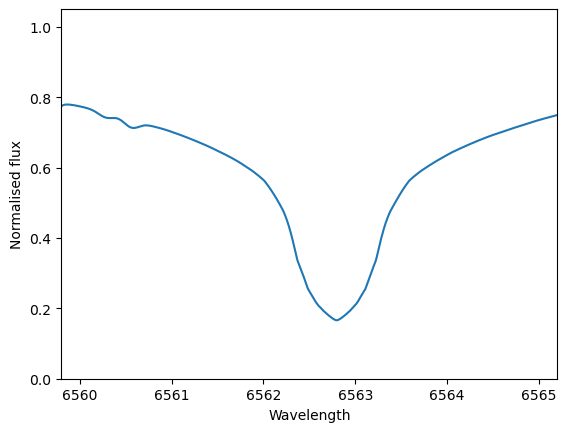

In [5]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": "../input_files/linelists/linelist_for_fitting/"}

teff = 5500.0
logg = 0.5
met = 0.0
vmic = 5.0
lmin = 6560
lmax = 6565
ldelta = 0.01
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True
element_abundances ={}  # elemental abundances [X/Fe]; if not written solar scaled ones are used
include_molecules = False  # way faster without them

# plots the data, but can also save it for later use
wavelength, flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, resolution=0, macro=0, rotation=0, verbose=True)
# /home/advait/Desktop/research/rcb-project/TSFitPy/input_files/hdc_model_atmospheres/1D/s5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod

In [44]:
# CHANGE NEXT LINE
output_folder_location: str = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-16-2024-00-04-26_0.9474440156676243_LTE_Na_1D" # CHANGE
# loads all data from config file and output, config is copied into output folder with name "configuration.txt" from now on
config_dict = load_output_data(output_folder_location)

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [45]:
output_results_pd_df = config_dict["output_file_df"]   # Pandas dataframe for your own use
print("Column names are:")
print(output_results_pd_df.columns.values)             # Column names if you want to plot them
output_results_pd_df

Column names are:
['specname' 'wave_center' 'wave_start' 'wave_end'
 'Doppler_Shift_add_to_RV' 'Fe_H' 'Na_Fe' 'Microturb' 'Macroturb'
 'rotation' 'chi_squared' 'ew' 'flag_error' 'flag_warning']


,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,Na_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,UVES_Sun-1_cleaned_norm.txt,6300.304,6300.0,6300.51,0.9524,-1.0,-0.0712,1.3316,15.0,0.0,10.728895,22.6858,10000,10011000


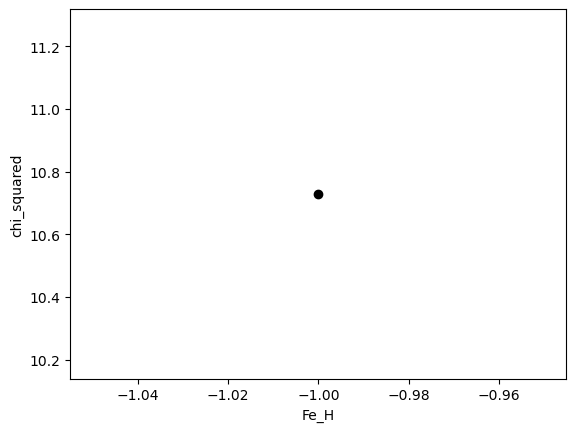

Only one point is found, so doing normal scatter plot


/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:300: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_results[x_axis_column], df_results[y_axis_column], **pltargs)


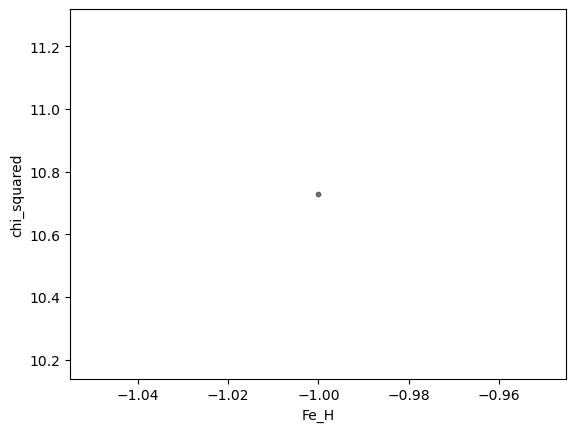

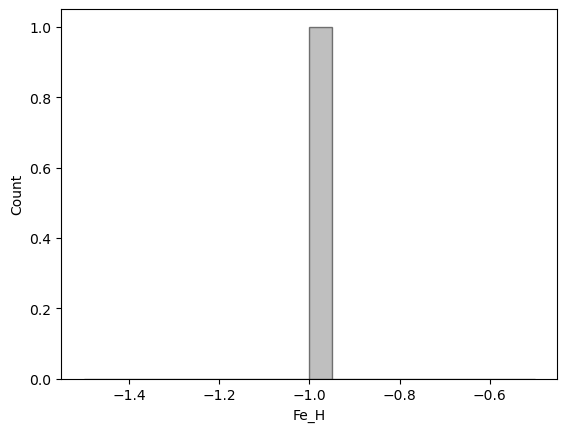

In [46]:
# can plot your own results using column names from the data frame
# can also take any extra arguments just like plt.scatter, example with color='black' is shown below
# can also add e.g. xlim=(-5, 5) or ylim=(-1, 1) for x and y limits
# CHANGE COLUMN NAMES IF NEEDED
plot_scatter_df_results(output_results_pd_df, "Fe_H", "chi_squared", color='black')
# works in similar way, but plots the density map with the desired cmap
# s=10 stands for point size
plot_density_df_results(output_results_pd_df, "Fe_H", "chi_squared", s=10, cmap="plasma_r", alpha=0.5)
# also histogram if needed as well
plot_histogram_df_results(output_results_pd_df, "Fe_H", color='grey', bins=20, alpha=0.5, histtype='bar', ec='black')

In [47]:
config_dict

{'filenames_output_folder': ['/media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-16-2024-00-04-26_0.9474440156676243_LTE_Na_1D/result_spectrum_UVES_Sun-1_cleaned_norm.txt_convolved.spec'],
 'linemask_location': '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-16-2024-00-04-26_0.9474440156676243_LTE_Na_1D/linemask.txt',
 'observed_spectra_location': '/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/.././input_files/observed_spectra/',
 'specname_fitlist': array(['UVES_Sun-1_cleaned_norm.txt'], dtype=object),
 'rv_fitlist': array([0.]),
 'output_folder_location': '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/Aug-16-2024-00-04-26_0.9474440156676243_LTE_Na_1D',
 'output_file_df':                       specname  wave_center  wave_start  wave_end  \
 0  UVES_Sun-1_cleaned_norm.txt     6300.304      6300.0   6300.51   
 
    Doppler_Shift_add_to_RV  Fe_H   Na_Fe  Microturb  Macroturb  rotation  \
 0                   0.9524  -1.0 -0

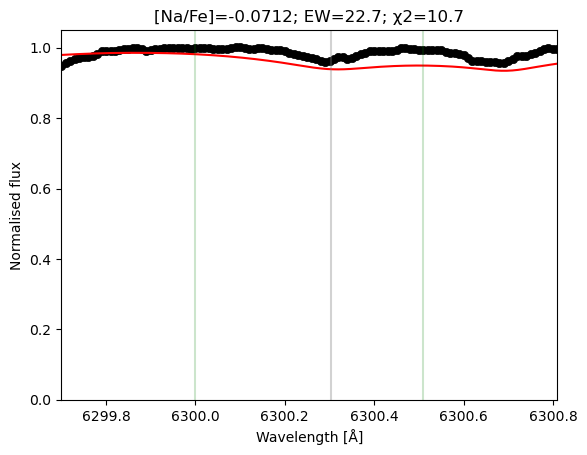

In [48]:
# CHANGE NEXT LINE
star_name_to_plot: str = "UVES_Sun-1_cleaned_norm.txt" # CHANGE
# plots all fitted lines for the requested star
plot_one_star(config_dict, star_name_to_plot, plot_title=True)

UVES_Sun-1_cleaned_norm.txt


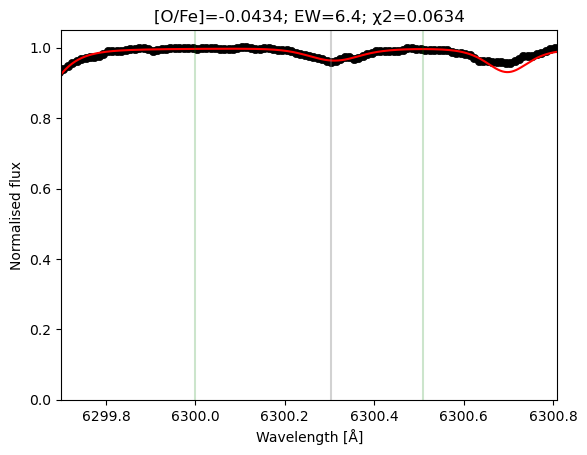

In [18]:
# can also plot all stars and all lines as well
for specname in set(output_results_pd_df["specname"].values):
    print(specname)
    plot_one_star(config_dict, specname, plot_title=True)

In [2]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": "../input_files/linelists/linelist_for_fitting/"}

teff = 5500.0
logg = 0.5
met = 0.0
vmic = 5.0
lmin = 6560
lmax = 6565
ldelta = 0.01
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True
element_abundances ={}  # elemental abundances [X/Fe]; if not written solar scaled ones are used
include_molecules = False  # way faster without them

# plots the data, but can also save it for later use
wavelength, flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, resolution=0, macro=0, rotation=0, verbose=True)
# /home/advait/Desktop/research/rcb-project/TSFitPy/input_files/hdc_model_atmospheres/1D/s5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod

AssertionError: Could not parse MARCS model filename <s5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.krz>